# Анализ интернет-магазина компьютерных игр «Стримчик»

**Перед нами данные интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Данные предоставлены до 2016 года.  
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».**  

**Описание данных:**
+ Name — название игры  
+ Platform — платформа  
+ Year_of_Release — год выпуска  
+ Genre — жанр игры  
+ NA_sales — продажи в Северной Америке (миллионы проданных копий)  
+ EU_sales — продажи в Европе (миллионы проданных копий)  
+ JP_sales — продажи в Японии (миллионы проданных копий)  
+ Other_sales — продажи в других странах (миллионы проданных копий)  
+ Critic_Score — оценка критиков (максимум 100)  
+ User_Score — оценка пользователей (максимум 10)  
+ Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  
Данные за 2016 год могут быть неполными.

Цели проекта:  
1) Отработать принцип работы с данными для дальнейшего прогнозирования продаж;   
2) Выявить определяющие успешность игры закономерности;   
3) Сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.    

Для достижения целей необходимо выполнить следующие задачи:  
Импорт библиотек
1. Загрузка данных  
  1.1 Открыть файл с данными    
  1.2 Изучить общую информацию о каждом датафрейме
2. Подготовка данных  
  2.1 Заменить названия столбцов   
  2.2 Обработка пропусков    
  2.3 Преобразование данных в нужные типы   
  2.4 Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец   
3. Исследовательский анализ данных  
  3.1 Посмотреть, сколько игр выпускалось в разные годы  
  3.2 Посмотреть, как менялись продажи по платформам  
  3.3 Определить актуальный период, чтобы данные помогли построить прогноз на 2017 год  
  3.4 Выбрать несколько потенциально прибыльных платформ  
  3.5 Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам  
  3.6 Построить диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами  
  3.7 Посмотреть на общее распределение игр по жанрам  
4. Портрет пользователя каждого региона  
  Определить для пользователя каждого региона (NA, EU, JP):  
  4.1 Самые популярные платформы (топ-5)    
  4.2 Самые популярные жанры (топ-5)  
  4.3 Влияние рейтинга ESRB на продажи в отдельном регионе  
5. Проверка гипотез  
  Проверить следующие гипотезы:  
  5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые  
  5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные  
6. Общий вывод


**Импорт библиотек**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

### Загрузка данных

**1.1 Откроем файл с данными**

In [2]:
data = pd.read_csv('/datasets/games.csv')

**1.2 Изучим общую информацию**

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Датафрейм содержит 16715 строк и 11 колонок, содержащих название игры, платформу, год выпуска, жанр, продажи в Северной Америке (миллионы проданных копий), продажи в Европе (миллионы проданных копий), продажи в Японии (миллионы проданных копий), продажи в других регионах (миллионы проданных копий), оценка критиков (максимум 100), оценка пользователей (максимум 10), рейтинг от организации ESRB.  
Некоторые столбцы содержат пропуски. 

### Подготовка данных

**2.1 Заменим названия столбцов (приведем к нижнему регистру)**

In [5]:
data.columns = data.columns.str.lower() #приведем названия столбцов к нижнему регистру

In [6]:
data.head() #выведем первые пять строк датафрейма для проверки 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**2.2 Обработка пропусков**

Прежде, чем преобразовывать типы данных, нам необходимо избавиться от пропусков. Проверим датафрейм на наличие пропусков.

In [7]:
data.isna().sum() #проверим количество пропусков в цифрах

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm') # проверим количество пропусков в процентах

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


Если данные брались из открытых источников, значит в пропусках может быть виновато отсутствие необходимых данных доступе или же пропуски появились на этапе загрузки или на этапе выгрузки данных, или из-за неправильного запроса или объединения таблиц.

+ В столбцах 'name' и 'genre' всего два пропуска, их можно удалить.  
+ Пропусков в столбце 'year_of_release' 269 - всего 2%, их также можно удалить.  
+ Пропусков в столбцах 'critic_score' и 'user_score' значительно больше, мы не можем их удалить и не можем заполнить медианой или средним, т.к. любое заполнение исказит результаты корреляционного анализа и статистических тестов, но можем заменить индикаторным значением.  
+ Пропуски в столбце 'rating' можно заменить "заглушкой", т.к. это категоиальная переменная. 

In [9]:
data = data.dropna(subset=['name', 'genre']).reset_index(drop=True) #удаляем пропуски из столбцов 'name' и 'genre'

In [10]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True) #удаляем пропуски из столбца 'year_of_release'

In [11]:
data['critic_score'].unique() #рассмотрим уникальные значения из столбца 'critic_score'

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [12]:
data['critic_score'] = data['critic_score'].fillna(-1) #пропуски заменим на индикаторное значение

In [13]:
data['user_score'].unique() #рассмотрим уникальные значения из столбца 'user_score'

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Помимо числовых значений и 'nan' еще есть 'tbd' - To Be Determined, т.е. рейтинг игры еще не определен. Это то же значение 'nan' в другом виде, поэтому можем его заменить.

In [14]:
data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True)

In [15]:
data['user_score'] = data['user_score'].fillna(-1) #пропуски заменим на индикаторное значение

In [16]:
data['rating'].unique() #рассмотрим уникальные значения из столбца 'rating'

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [17]:
data['rating'] = data['rating'].fillna('unknown') #пропуски заменим на "заглушку"

Помимо пропусков, проверим данные на наличие дубликатов

In [18]:
data.duplicated().sum() #проверим явные дубликаты

0

Явных дубликатов не обнаружено

Искать неявные дубликаты по отдельным столбцам не имеет смысла, т.к. у нас есть столбцы с категориальными переменными, где данные так или иначе повторяются, но можно поискать дубликаты в срезе по названию игры, платформе и году выпуска

In [19]:
data[['name', 'platform', 'year_of_release']].duplicated().sum() #ищем дубликаты в срезе

1

In [20]:
data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep=False, inplace=True) #удаляем дубликаты

In [21]:
data[['name', 'platform', 'year_of_release']].duplicated().sum() #проверяем еще раз

0

Дубликаты удалены

In [22]:
data.info() #выведем информацию по таблице

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16442 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16442 non-null  object 
 1   platform         16442 non-null  object 
 2   year_of_release  16442 non-null  float64
 3   genre            16442 non-null  object 
 4   na_sales         16442 non-null  float64
 5   eu_sales         16442 non-null  float64
 6   jp_sales         16442 non-null  float64
 7   other_sales      16442 non-null  float64
 8   critic_score     16442 non-null  float64
 9   user_score       16442 non-null  object 
 10  rating           16442 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


**2.3 Преобразуем данные в нужные типы**

In [23]:
data['year_of_release'] = data['year_of_release'].astype('int64') #поменяем тип данных столбца 'year_of_release' на int, т.к. помимо года нет других категорий обозначения даты

In [24]:
data['critic_score'] = data['critic_score'].astype('int64') #поменяем тип данных столбца 'critic_score' на int, т.к. все значения столбца целочисленные

In [25]:
data['user_score'] = data['user_score'].astype('float64') #поменяем тип данных столбца 'user_score' на float

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16442 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16442 non-null  object 
 1   platform         16442 non-null  object 
 2   year_of_release  16442 non-null  int64  
 3   genre            16442 non-null  object 
 4   na_sales         16442 non-null  float64
 5   eu_sales         16442 non-null  float64
 6   jp_sales         16442 non-null  float64
 7   other_sales      16442 non-null  float64
 8   critic_score     16442 non-null  int64  
 9   user_score       16442 non-null  float64
 10  rating           16442 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [27]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown


**2.4 Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец**

In [28]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

**Вывод:** в ходе предобработки данных были устранены пропуски и изменены типы данных, дубликатов не обнаружено. Суммарные продажи высчитаны и записаны в отдельный столбец. Можем переходить к следующему этапу.

### Исследовательский анализ данных

**3.1 Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

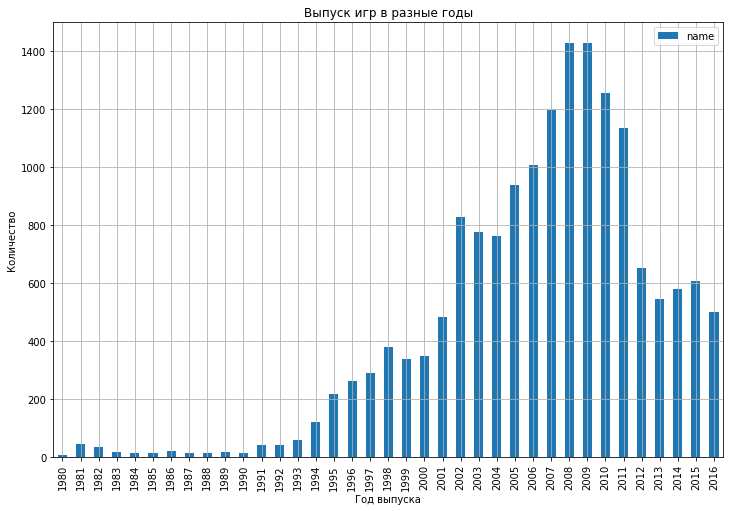

In [29]:
#создадим сводную таблицу, по которой выведем столбчатую диаграмму
data.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar', figsize=(12,8), grid=True)
plt.title('Выпуск игр в разные годы')
plt.ylabel('Количество')
plt.xlabel('Год выпуска')
plt.show()

До середины 90-х игр выпускалось не очень много, т.к. компьютеры и игровые приставки в то время были далеко не у всех. Далее, к середине 90-х мы видим плавный рост вместе с распроастранением приставок и ПК. Пик значений (свыше 1400) приходится на 2008 и 2009 год. Далее мы видим спад, скорее всего, связанный с развитием смартфонов и выпуском игр исключительно для мобильных устройств.   
Данные представлены с 1980 по 2016 год, т.е. за 36 лет. Для составления наиболее точной картины выпуска игр данных достаточно, но для составления дальнейших прогнозов много, можно ограничиться 5-10 годами.

**3.2 Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

In [30]:
platform_sales = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
platform_sales = platform_sales.reset_index().rename_axis(None, axis=1)
platform_sales #выведем сводную таблицу с суммой продаж по каждой платформе

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,928.77
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


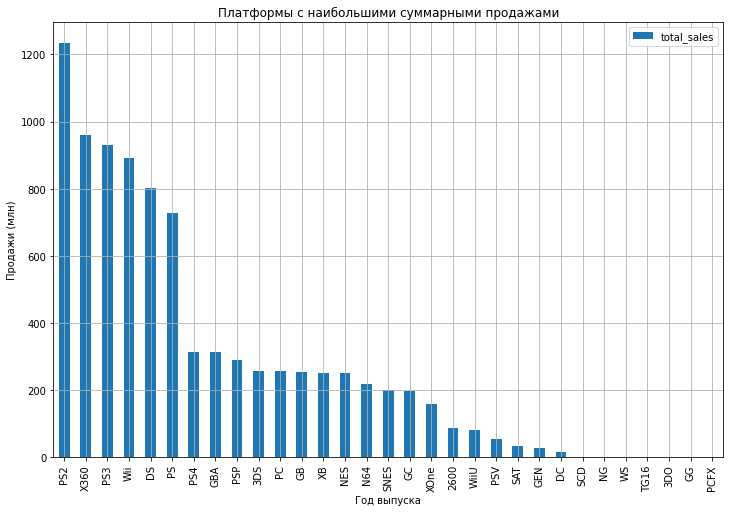

In [31]:
#создадим сводную таблицу, по которой выведем столбчатую диаграмму
data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).plot(kind='bar', figsize=(12,8), grid=True)
plt.title('Платформы с наибольшими суммарными продажами')
plt.ylabel('Продажи (млн)')
plt.xlabel('Год выпуска')
plt.show()

В первой десятке платформ с наибольшими суммарными продажами , в основном, различные приставки и игровые консоли: PS2, X360, PS3, Wii, DS, PS. Самая популярная платформа PS2 (более 1200 млн продаж), следом за ней идут X360 и PS3 с продажами, превышающими 900 млн.  
PC в десятку не входит.  

Для дальнейшего прогнозирования нам не нужны данные за весь период, поэтому ограничимся данными за последние 15 лет (с 2001 по 2016 год)

In [32]:
#создадим собсвтенную функцию, которая будет возвращать нужную сводную таблицу и выводить данные с 2001 года
def years_sales(name, data):
    part = data[(data['platform'] == name) & (data['year_of_release'] > 2001)]
    total = part.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)
    return total

In [33]:
#cоздадим таблицу по платформам и их обшим продажам, отсортируем по убыванию и оставим только топ-5
top_5 = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(5)
top_5 = top_5.reset_index().rename_axis(None, axis=1)

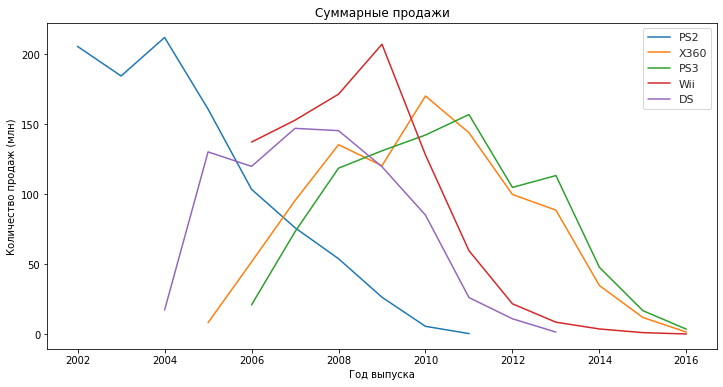

In [34]:
#выведем линейную диаграмму по каждой платформе с 2001 по 2016 год
plt.figure(figsize=(12,6))
plt.title('Суммарные продажи')
plt.xlabel('Год выпуска')
plt.ylabel('Количество продаж (млн)')

#создадим цикл для отображения данных в диаграмме
for i in list(top_5['platform']):
    sns.lineplot(data=years_sales(i,data)['total_sales'], label=i)
    sns.set(style='whitegrid')
    plt.legend()

По диаграмме видно, что в среднем платформы существуют около 10 лет: в первые пять происходит активный рост, к 5-6 годам достигает своего пика, и идет на спад.

**3.3 Определим актуальный период и возьмем данные за соответствующий актуальный период, чтобы данные помогли построить прогноз на 2017 год.**

Так как платформы, в среднем, существуют около 10 лет, нам нужно выбрать данные за 4-5 лет, чтобы построить прогноз на 2017 год. Таким образом, мы сможем увидеть какие из платформ растут, а какие идут на спад. Соответственно, берем данные за 2012-2016 годы, а данные ранее 2012 года учитывать не будем. Меньший период брать бессмысленно, т.к. данные за 2016 год могут быть неполными.

**3.4 Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.**

In [35]:
relevant_data = data.query('year_of_release >= 2012') #делаем срез для данных за 2012 год и позже
relevant_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79


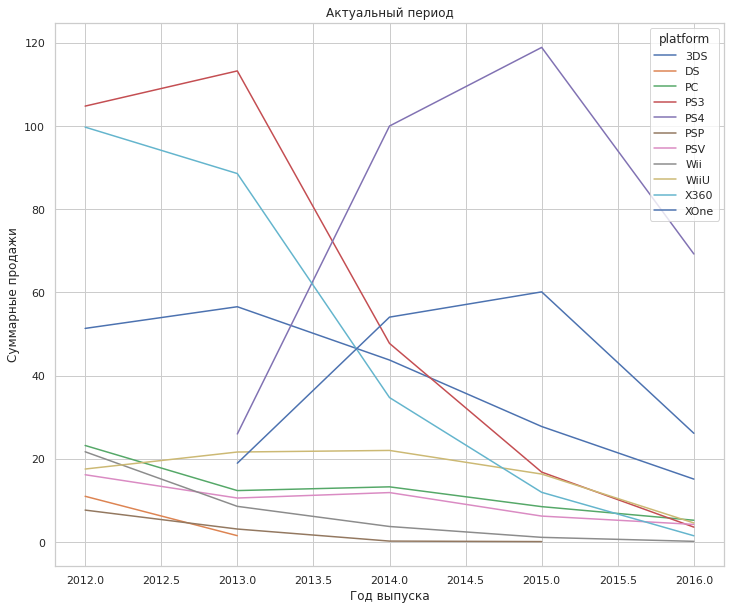

In [36]:
relevant_data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(
    title = 'Актуальный период', xlabel='Год выпуска', ylabel='Суммарные продажи', figsize=(12,10))
plt.show()

По диаграмме видно, что к 2016 году лучшие продажи у PS4 и XOne, которые сравнительно недавно появились на рынке (в 2013) и у 3DS, они и являются потенциально прибыльными в будущем.

**3.5 Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам и опишем результат.**

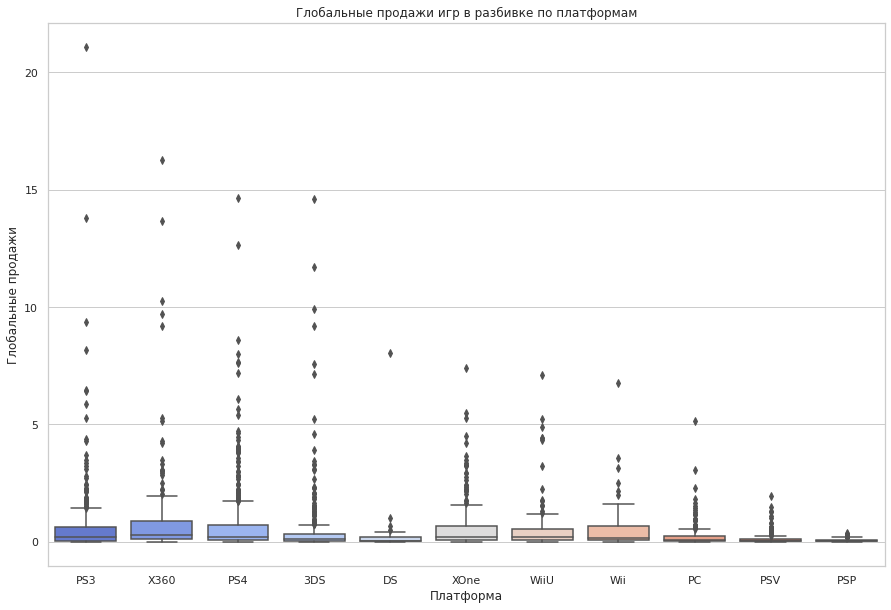

In [37]:
#выведем диаграмму размаха по глобальным продажам за актуальный период
plt.figure(figsize=(15,10))
sns.boxplot(data=relevant_data, x='platform', y='total_sales', palette='coolwarm') 
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')
plt.title('Глобальные продажи игр в разбивке по платформам')
plt.show()

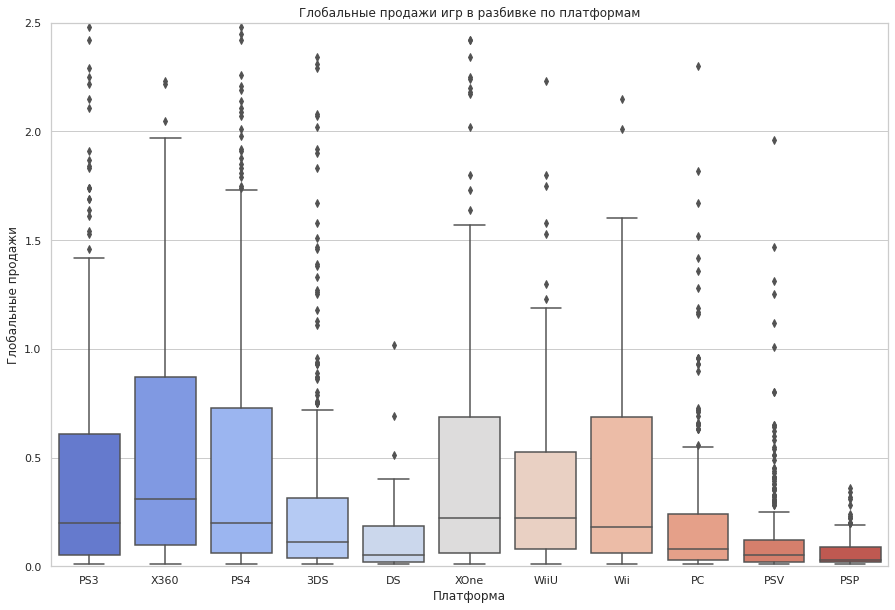

In [38]:
plt.figure(figsize=(15,10))
sns.boxplot(data=relevant_data, x='platform', y='total_sales', palette='coolwarm')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')
plt.title('Глобальные продажи игр в разбивке по платформам')
plt.ylim(0, 2.5) #изменим параметры, чтобы лучше видить непосредственно "ящики", а не выбросы
plt.show()

По диаграмме размаха видно, что лучшие продажи у X360 (почти 2 млн), далее идет PS4 (свыше 1.7 млн), затем Wii и XOne (свыше 1.5 млн). Медианы всех платформ раздичаются в пределах от 0.05 до 0.2 млн.  
График каждой из платформ содержит значительные или незначительные выбросы. В контексте продаж в игровой индустрии выбросы могут означать самые популярные игры. Чем больше выбросов, тем больше вероятность выхода популярной игры.

**3.6 Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.**

In [39]:
x360 = relevant_data[(relevant_data['platform'] == 'X360') & (relevant_data['critic_score'] > 0)] #сделаем срез, чтобы данные были только по актуальной платформе и с актуальными значениями оценок
x360['critic_score'].corr(x360['total_sales']) #выведем коэффициент корреляции Пирсона

0.3605734888507336

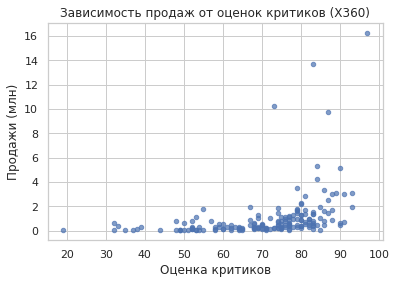

In [40]:
x360.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.7, grid=True) #выведем диаграмму рассеяния
plt.title('Зависимость продаж от оценок критиков (X360)')
plt.ylabel('Продажи (млн)')
plt.xlabel('Оценка критиков')
plt.show()

Коэффициент корреляции Пирсона 0.36, явной линейной зависимости нет. По диаграмме рассеяния же можем наблюдать соответствие высокой оценки критиков высоким объемам продаж, но точно связать два этих фактора нельзя. 

In [41]:
x360 = relevant_data[(relevant_data['platform'] == 'X360') & (relevant_data['user_score'] > 0)] #сделаем отдельный срез по оценкам пользователей
x360['user_score'].corr(x360['total_sales'])

0.006163978646213326

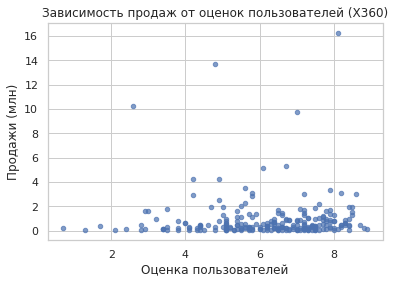

In [42]:
x360.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.7, grid=True) #выведем диаграмму рассеяния
plt.title('Зависимость продаж от оценок пользователей (X360)')
plt.ylabel('Продажи (млн)')
plt.xlabel('Оценка пользователей')
plt.show()

Коэффициент корреляции вданном случае очень низкий, 0.006, линейная зависимость отсутствует.

In [43]:
ps4 = relevant_data[(relevant_data['platform'] == 'PS4') & (relevant_data['critic_score'] > 0)]
ps4['critic_score'].corr(ps4['total_sales'])

0.40656790206178095

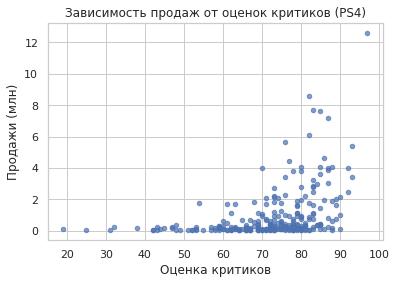

In [44]:
ps4.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.7, grid=True) #выведем диаграмму рассеяния
plt.title('Зависимость продаж от оценок критиков (PS4)')
plt.ylabel('Продажи (млн)')
plt.xlabel('Оценка критиков')
plt.show()

Коэффициент корреляции Пирсона в данном случае 0.40 говорит о наличии связи, но не слишком сильной, т.е. возможно, в каких-то случаях продажи зависят от рейтинга критиков, но также возможно влияние других факторов на эти явления. То же мы видим по диаграмме рассеяния.

In [45]:
ps4 = relevant_data[(relevant_data['platform'] == 'PS4') & (relevant_data['user_score'] > 0)]
ps4['user_score'].corr(ps4['total_sales'])

-0.031957110204556376

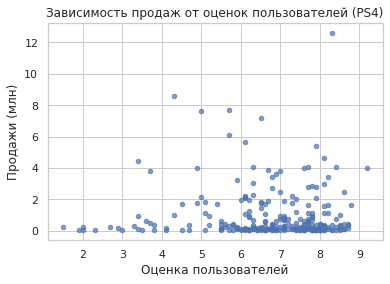

In [46]:
ps4.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.7, grid=True) #выведем диаграмму рассеяния
plt.title('Зависимость продаж от оценок пользователей (PS4)')
plt.ylabel('Продажи (млн)')
plt.xlabel('Оценка пользователей')
plt.show()

Коэффициент корреляции -0.03 говорит об отсутствии линейной связи между рейтингом пользователей и объемом продаж.

In [47]:
xone = relevant_data[(relevant_data['platform'] == 'XOne') & (relevant_data['critic_score'] > 0)]
xone['critic_score'].corr(xone['total_sales'])

0.4169983280084017

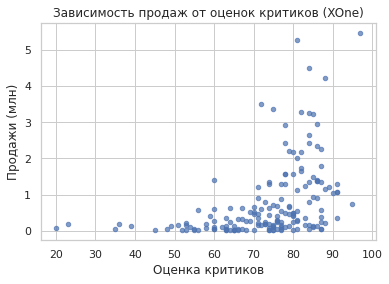

In [48]:
xone.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.7, grid=True) #выведем диаграмму рассеяния
plt.title('Зависимость продаж от оценок критиков (XOne)')
plt.ylabel('Продажи (млн)')
plt.xlabel('Оценка критиков')
plt.show()

Коэффициент корреляции Пирсона 0.41, явной линейной зависимости нет. По диаграмме рассеяния же можем наблюдать соответствие высокой оценки критиков высоким объемам продаж, как и было ранее. Явления могут быть не связаны, но если игра действительно хорошая, критики могут поставить ей высокую оценку, а множество пользователи приобрести.

In [49]:
xone = relevant_data[(relevant_data['platform'] == 'XOne') & (relevant_data['user_score'] > 0)]
xone['user_score'].corr(xone['total_sales'])

-0.06892505328279414

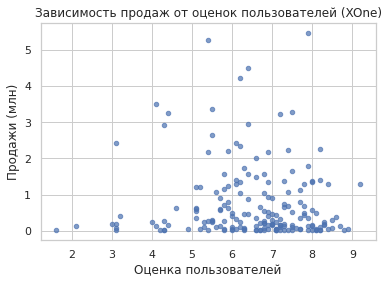

In [50]:
xone.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.7, grid=True) #выведем диаграмму рассеяния
plt.title('Зависимость продаж от оценок пользователей (XOne)')
plt.ylabel('Продажи (млн)')
plt.xlabel('Оценка пользователей')
plt.show()

Коэффициент корреляции -0.06 говорит об отсутствии линейной связи между рейтингом пользователей и объемом продаж.

In [51]:
wii = relevant_data[(relevant_data['platform'] == 'Wii') & (relevant_data['critic_score'] > 0)]
wii['critic_score'].corr(wii['total_sales'])

-0.4243413011077494

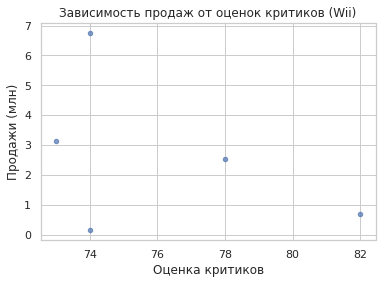

In [52]:
wii.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.7, grid=True) #выведем диаграмму рассеяния
plt.title('Зависимость продаж от оценок критиков (Wii)')
plt.ylabel('Продажи (млн)')
plt.xlabel('Оценка критиков')
plt.show()

Коэффициент корреляции -0.42, линейная связь между рейтингом пользователей и объемом продаж слабая, на графике недостаточно данных.

In [53]:
wii = relevant_data[(relevant_data['platform'] == 'Wii') & (relevant_data['user_score'] > 0)]
wii['user_score'].corr(wii['total_sales'])

0.29619680007479526

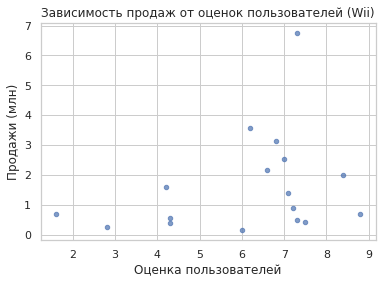

In [54]:
wii.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.7, grid=True) #выведем диаграмму рассеяния
plt.title('Зависимость продаж от оценок пользователей (Wii)')
plt.ylabel('Продажи (млн)')
plt.xlabel('Оценка пользователей')
plt.show()

Коэффициент корреляции 0.29 говорит о крайне слабой линейной связи между рейтингом пользователей и объемом продаж, на графике недостаточно данных.

In [55]:
ps3 = relevant_data[(relevant_data['platform'] == 'PS3') & (relevant_data['critic_score'] > 0)]
ps3['critic_score'].corr(ps3['total_sales'])

0.33205850244757606

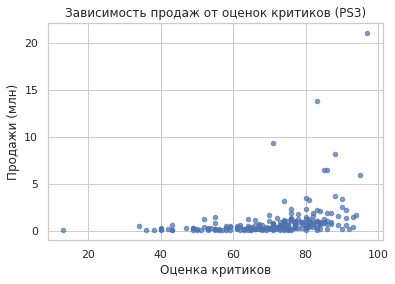

In [56]:
ps3.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.7, grid=True) #выведем диаграмму рассеяния
plt.title('Зависимость продаж от оценок критиков (PS3)')
plt.ylabel('Продажи (млн)')
plt.xlabel('Оценка критиков')
plt.show()

Коэффициент корреляции Пирсона 0.33, линейная зависимость не выражена. По диаграмме рассеяния так же, как и ранее мы можем наблюдать увеличение объема продаж с более высокой оценкой критиков, но с увереннностью утрвеждать, что эти показатели друг с другом связаны нельзя. 

In [57]:
ps3 = relevant_data[(relevant_data['platform'] == 'PS3') & (relevant_data['user_score'] > 0)]
ps3['user_score'].corr(ps3['total_sales'])

-0.0041581894802458766

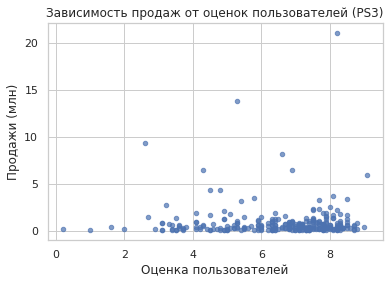

In [58]:
ps3.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.7, grid=True) #выведем диаграмму рассеяния
plt.title('Зависимость продаж от оценок пользователей (PS3)')
plt.ylabel('Продажи (млн)')
plt.xlabel('Оценка пользователей')
plt.show()

Коэффициент корреляции Пирсона -0.04, линейная связь между рейтингом пользователей и объемом продаж отсутствует.

**Вывод:** вне зависимости от платформы линейная зависимость между оценкой критиков и объемом продаж наблюдается слабо, линейная зависимость между оценкой пользователей и объемом продаж не наблюдается.

**3.7 Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

In [59]:
relevant_data['sales_median'] = relevant_data['total_sales'].median() #создадим столбец с медианой общих продаж
relevant_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,sales_median
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05,0.12
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27,0.12
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63,0.12
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,unknown,14.60,0.12
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79,0.12


In [60]:
#создадим сводную таблицу с распределением игр по жанрам
genre_destribution = relevant_data.pivot_table(
    index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
genre_destribution = genre_destribution.reset_index().rename_axis(None, axis=1)
genre_destribution #выведем таблицу

,genre,total_sales
0,Action,441.12
1,Shooter,304.73
2,Role-Playing,192.80
3,Sports,178.50
4,Misc,85.04
5,Platform,61.00
6,Racing,53.50
7,Fighting,44.49
8,Simulation,35.12
9,Adventure,29.43


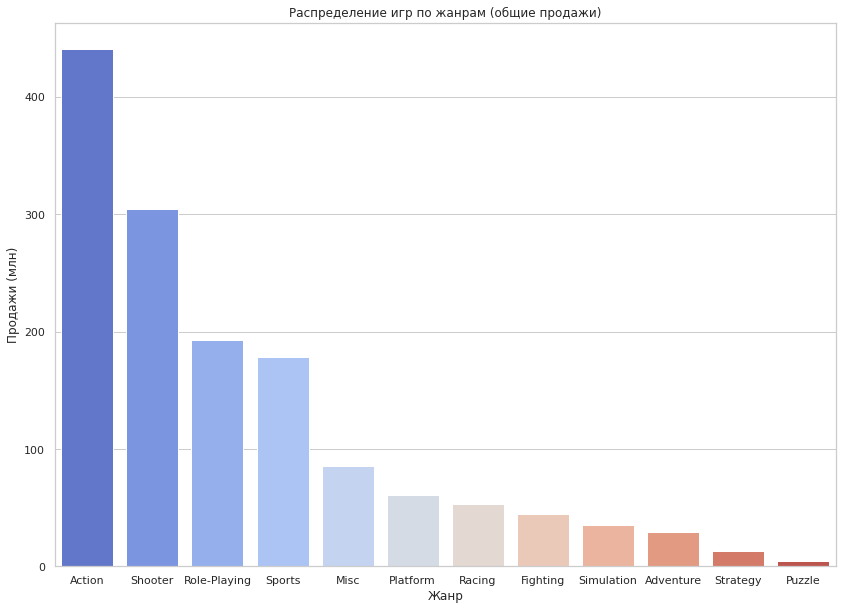

In [61]:
plt.figure(figsize=(14, 10)) #выведем столбчатую диаграмму для наглядности
sns.barplot(data=genre_destribution, x='genre', y='total_sales', palette='coolwarm')
plt.title('Распределение игр по жанрам (общие продажи)')
plt.ylabel('Продажи (млн)')
plt.xlabel('Жанр')
plt.show()

Самый прибыльный жанр по общим продажам - action (свыше 400 млн продаж), следом за ним идет shooter (свыше 300 млн) и rpg (свыше 190 млн). Хуже всего продаются игры жанра strategy (менее 14 млн) и puzzle (менее 5 млн). Разрыв между жанрами с лучшими и худшими продажами составляет почти 400 млн.

In [62]:
#создадим сводную таблицу с распределением игр по жанрам
genre_destribution_median = relevant_data.pivot_table(
    index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False)
genre_destribution_median = genre_destribution_median.reset_index().rename_axis(None, axis=1)
genre_destribution_median #выведем таблицу

,genre,total_sales
0,Shooter,0.440
1,Sports,0.240
2,Platform,0.210
3,Role-Playing,0.140
4,Racing,0.140
5,Fighting,0.130
6,Action,0.120
7,Misc,0.120
8,Simulation,0.120
9,Strategy,0.080


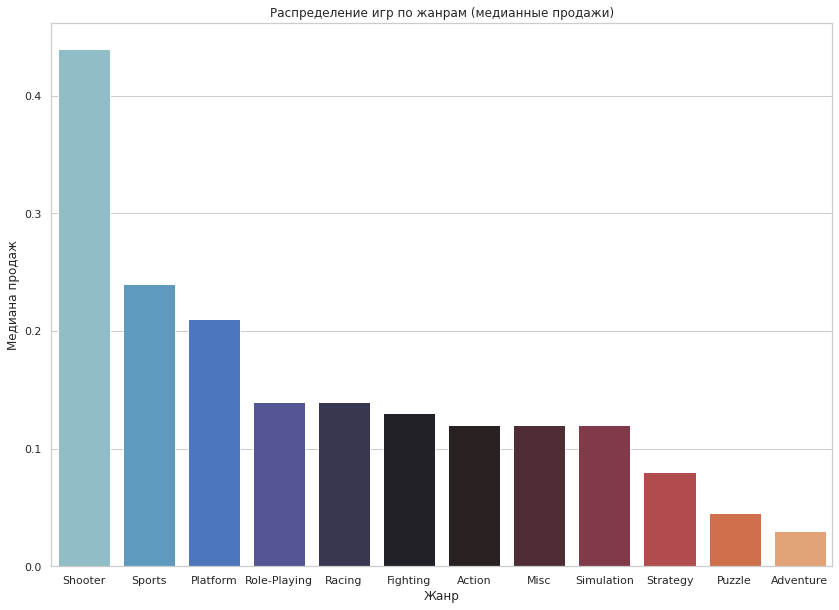

In [63]:
plt.figure(figsize=(14, 10)) #выведем столбчатую диаграмму для наглядности
sns.barplot(data=genre_destribution_median, x='genre', y='total_sales', palette='icefire')
plt.title('Распределение игр по жанрам (медианные продажи)')
plt.ylabel('Медиана продаж')
plt.xlabel('Жанр')
plt.show()

При анализе медианных продаж самый прибыльный жанр - Shooter, за ним идет Sports, а наименее прибыльный - Adventure.

**Вывод:** До середины 90-х игр выпускалось не очень много, т.к. компьютеры и игровые приставки в то время были далеко не у всех. К середине 90-х мы видим плавный рост вместе с распространением приставок и ПК. Пик значений (свыше 1400) приходится на 2008 и 2009 год. Далее мы видим спад, скорее всего, связанный с развитием смартфонов и выпуском игр исключительно для мобильных устройств.  
В первой десятке платформ с наибольшими суммарными продажами, в основном, различные приставки и игровые консоли: PS2, X360, PS3, Wii, DS, PS. Самая популярная платформа PS2 (более 1200 млн продаж), следом за ней идут X360 и PS3 с продажами, превышающими 900 млн.   
В среднем платформы существуют около 10 лет: в первые пять происходит активный рост, к 5-6 годам достигает своего пика, и идет на спад.  
Актуальный период анализируемых данных для дальнейшего прогнозирования 4-5 лет, поэтому берем данные за 2012-2016 годы. Таким образом, мы сможем увидеть какие из платформ растут, а какие идут на спад.  
К 2016 году лучшие продажи оказались у PS4 и XOne, которые сравнительно недавно появились на рынке (в 2013) и у 3DS, они и являются потенциально прибыльными в будущем.  
Вне зависимости от платформы линейная зависимость между оценкой критиков и объемом продаж наблюдается слабо, линейная зависимость между оценкой пользователей и объемом продаж не наблюдается.  
При анализе медианных продаж самый прибыльный жанр - Shooter, за ним идет Sports, а наименее прибыльный - Adventure.

### Портрет пользователя каждого региона

**Определим для пользователя каждого региона (NA, EU, JP)**

**4.1 Самые популярные платформы (топ-5) и опишем различия в долях продаж.**

In [64]:
#создадим сводную таблицу 'Топ-5 платформ в Северной Америке'
na_platform = relevant_data.pivot_table(
    index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head()
na_platform = na_platform .reset_index().rename_axis(None, axis=1)
na_platform 

,platform,na_sales
0,X360,140.05
1,PS4,108.74
2,PS3,101.27
3,XOne,93.12
4,3DS,55.31


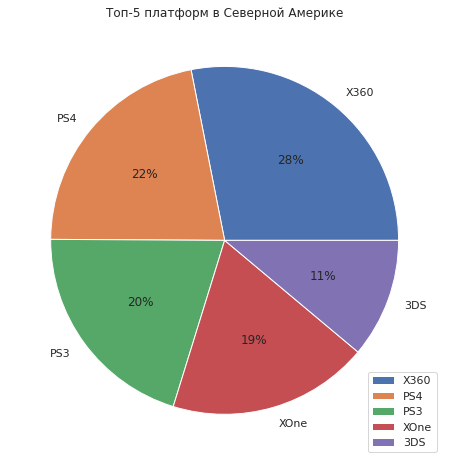

In [65]:
relevant_data.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(
    by='na_sales', ascending=False).head().plot(kind='pie', figsize=(8, 8), autopct='%1.0f%%', subplots=True)
plt.title('Топ-5 платформ в Северной Америке') #построим круговую диаграмму 'Топ-5 платформ в Северной Америке'
plt.ylabel('')
plt.show()

Самые популярные платформы в Северной Америке X360 (140 млн, 28%), PS4 (108 млн, 22%) и PS3 (101 млн, 20%).

In [66]:
#создадим сводную таблицу 'Топ-5 платформ в Европе'
eu_platform = relevant_data.pivot_table(
    index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()
eu_platform = eu_platform .reset_index().rename_axis(None, axis=1)
eu_platform 

,platform,eu_sales
0,PS4,141.09
1,PS3,106.63
2,X360,74.52
3,XOne,51.59
4,3DS,42.64


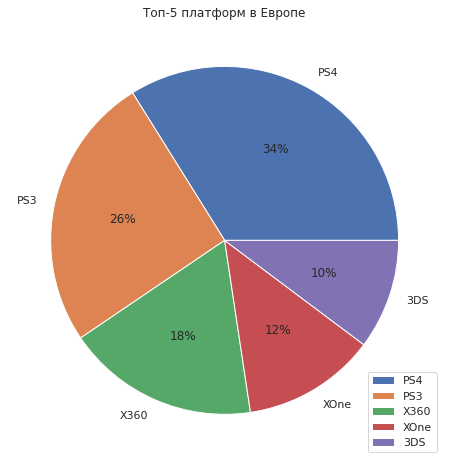

In [67]:
relevant_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(
    by='eu_sales', ascending=False).head().plot(kind='pie', figsize=(8, 8), autopct='%1.0f%%', subplots=True)
plt.title('Топ-5 платформ в Европе') #построим круговую диаграмму 'Топ-5 платформ в Европе'
plt.ylabel('')
plt.show()


В Европе популярны те же платформы, но уже в другом процентном соотношении: на первом месте PS4 (141 млн, 34%), на втором PS3 (106 млн, 26%), на третьем - X360 (74 млн, 18%).

In [68]:
#создадим сводную таблицу 'Топ-5 платформ в Японии'
jp_platform = relevant_data.pivot_table(
    index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()
jp_platform = jp_platform .reset_index().rename_axis(None, axis=1)
jp_platform 

,platform,jp_sales
0,3DS,87.79
1,PS3,35.29
2,PSV,21.04
3,PS4,15.96
4,WiiU,13.01


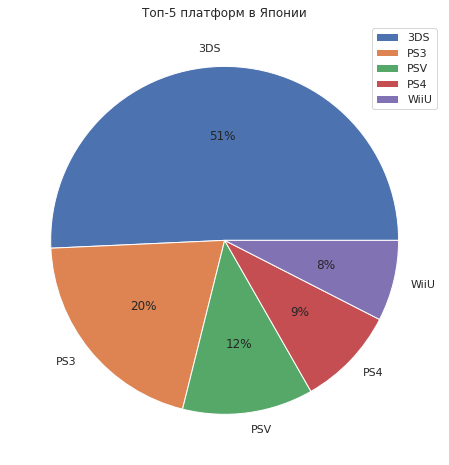

In [69]:
relevant_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(
    by='jp_sales', ascending=False).head().plot(kind='pie', figsize=(8, 8), autopct='%1.0f%%', subplots=True)
plt.title('Топ-5 платформ в Японии') #построим круговую диаграмму 'Топ-5 платформ в Японии'
plt.ylabel('')
plt.show()

В Японии совершенно другая картина, самая популярная платформа 3DS (87 млн, 51%), далее идет PS3 (35 млн, 20%) и PSV (21 млн, 12%).

**4.2 Самые популярные жанры (топ-5)**

In [70]:
#создадим сводную таблицу 'Топ-5 жанров в Северной Америке'
na_genres = relevant_data.pivot_table(
    index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head()
na_genres = na_genres.reset_index().rename_axis(None, axis=1)
na_genres 

,genre,na_sales
0,Action,177.84
1,Shooter,144.77
2,Sports,79.42
3,Role-Playing,64.00
4,Misc,38.19


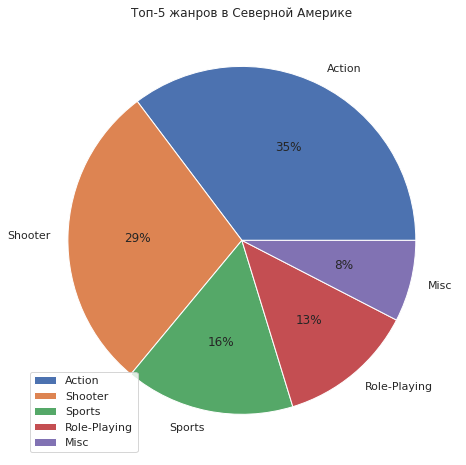

In [71]:
relevant_data.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(
    by='na_sales', ascending=False).head().plot(kind='pie', figsize=(8, 8), autopct='%1.0f%%', subplots=True)
plt.title('Топ-5 жанров в Северной Америке') #построим круговую диаграмму 'Топ-5 жанров в Северной Америке'
plt.ylabel('')
plt.legend(loc='lower left')
plt.show()

Самые популярные жанры в Северной Америке: Action (177 млн, 35%), Shooter (144 млн, 29%), Sports (79 млн, 16%).

In [72]:
#создадим сводную таблицу 'Топ-5 жанров в Европе'
eu_genres = relevant_data.pivot_table(
    index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()
eu_genres = eu_genres.reset_index().rename_axis(None, axis=1)
eu_genres 

,genre,eu_sales
0,Action,159.34
1,Shooter,113.47
2,Sports,68.86
3,Role-Playing,48.53
4,Racing,27.29


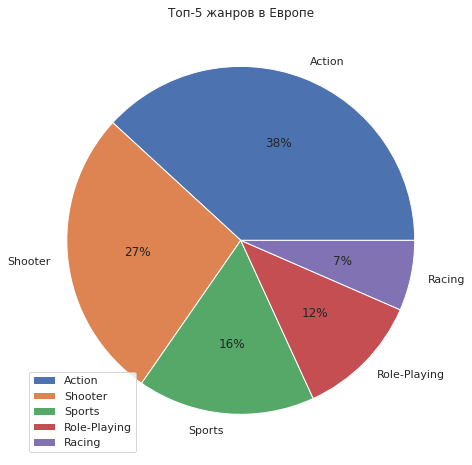

In [73]:
relevant_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(
    by='eu_sales', ascending=False).head().plot(kind='pie', figsize=(8, 8), autopct='%1.0f%%', subplots=True)
plt.title('Топ-5 жанров в Европе') #построим круговую диаграмму 'Топ-5 жанров в Европе'
plt.ylabel('')
plt.legend(loc='lower left')
plt.show()

В Европе, точно так же, как и в Северной Америке лидируют жанры Action (159 млн, 38%), Shooter (113 млн, 27%), Sports (68 млн, 16%).

In [74]:
#создадим сводную таблицу 'Топ-5 жанров в Японии'
jp_genres = relevant_data.pivot_table(
    index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()
jp_genres = jp_genres.reset_index().rename_axis(None, axis=1)
jp_genres 

,genre,jp_sales
0,Role-Playing,65.44
1,Action,52.80
2,Misc,12.86
3,Simulation,10.41
4,Fighting,9.44


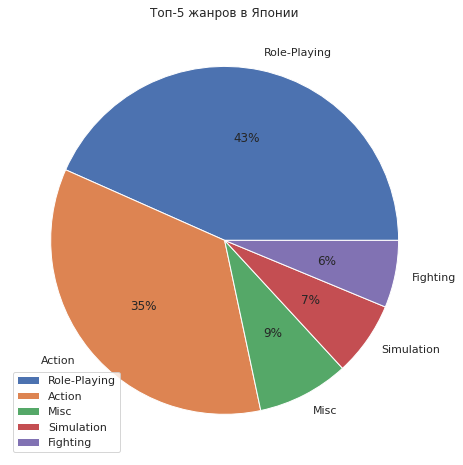

In [75]:
relevant_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(
    by='jp_sales', ascending=False).head().plot(kind='pie', figsize=(8, 8), autopct='%1.0f%%', subplots=True)
plt.title('Топ-5 жанров в Японии') #построим круговую диаграмму 'Топ-5 жанров в Японии'
plt.ylabel('')
plt.legend(loc='lower left')
plt.show()

В Японии по жанрам лидируют Role-Playing (65 млн, 43%), Action (52 млн, 35%) и Misc (то есть, miscellaneous - разное, 12 млн, 9%).

**4.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

In [76]:
data['rating'].unique() #выведем уникальные значения столбца 'rating'

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

В системе рейтинга ESRB встречаются следующие категории:  
+ EC (Early childhood) — для детей младшего возраста (3+);  
+ E (Everyone) — для всех (6+);  
+ K-A (Kids to Adults) — для всех (в 1998 изменен на E);  
+ E10+ (Everyone 10 and older) — для всех от 10 лет и старше (10+);  
+ T (Teen) — подросткам (13+);  
+ M (Mature) — для взрослых (17+);  
+ AO (Adults Only 18+) — только для взрослых (18+);  
+ RP (Rating Pending) — рейтинг ожидается;  
+ unknown — рейтинг неизвестен.  

In [77]:
new_relevant_data = relevant_data[(relevant_data['rating'] != 'unknown')] #избавимся от значения 'unknown'

In [78]:
#создадим сводную таблицу 'Топ-5 рейтингов в Северной Америке'
na_rating = new_relevant_data.pivot_table(
    index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head()
na_rating = na_rating.reset_index().rename_axis(None, axis=1)
na_rating

,rating,na_sales
0,M,231.57
1,E,112.26
2,E10+,75.70
3,T,66.02


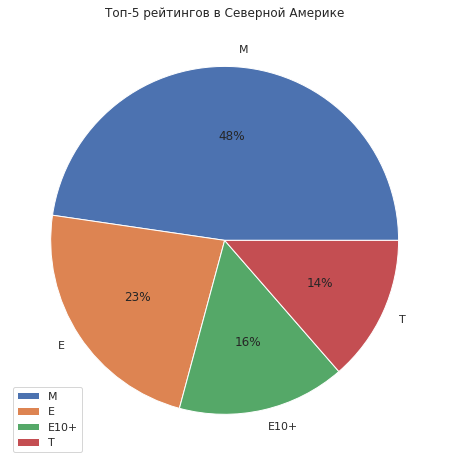

In [79]:
new_relevant_data.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(
    by='na_sales', ascending=False).head().plot(kind='pie', figsize=(8, 8), autopct='%1.0f%%', subplots=True)
plt.title('Топ-5 рейтингов в Северной Америке') #построим круговую диаграмму 'Топ-5 рейтингов в Северной Америке'
plt.ylabel('')
plt.legend(loc='lower left')
plt.show()

In [80]:
#создадим альтернативную сводную таблицу 'Топ-5 рейтингов в Северной Америке', включающую в себя неизвестные рейтинги
na_rating_unknown = relevant_data.pivot_table(
    index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head()
na_rating_unknown = na_rating_unknown.reset_index().rename_axis(None, axis=1)
na_rating_unknown

,rating,na_sales
0,M,231.57
1,E,112.26
2,unknown,103.31
3,E10+,75.70
4,T,66.02


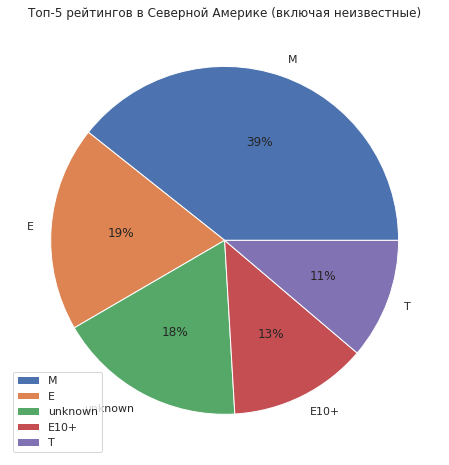

In [81]:
relevant_data.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(
    by='na_sales', ascending=False).head().plot(kind='pie', figsize=(8, 8), autopct='%1.0f%%', subplots=True)
plt.title('Топ-5 рейтингов в Северной Америке (включая неизвестные)') #построим круговую диаграмму 'Топ-5 рейтингов в Северной Америке (включая неизвестные)'
plt.ylabel('')
plt.legend(loc='lower left')
plt.show()

В Северной Америке наиболее популярны игры с рейтингом M (231 млн, 48%), следом идут игры с рейтингом E (112 млн, 23%) и игры с с рейтингом E10+ (75 млн, 16%). Если оставить неизвестные рейтинги, они занимают третье место по популярности (103 млн, 18%).

In [82]:
#создадим сводную таблицу 'Топ-5 рейтингов в Европе'
eu_rating = new_relevant_data.pivot_table(
    index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()
eu_rating = eu_rating.reset_index().rename_axis(None, axis=1)
eu_rating

,rating,eu_sales
0,M,193.96
1,E,112.80
2,E10+,55.37
3,T,52.96


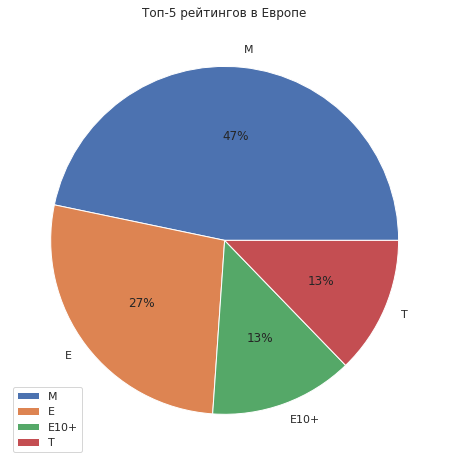

In [83]:
new_relevant_data.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(
    by='eu_sales', ascending=False).head().plot(kind='pie', figsize=(8, 8), autopct='%1.0f%%', subplots=True)
plt.title('Топ-5 рейтингов в Европе') #построим круговую диаграмму 'Топ-5 рейтингов в Европе'
plt.ylabel('')
plt.legend(loc='lower left')
plt.show()

In [84]:
#создадим альтернативную сводную таблицу 'Топ-5 рейтингов в Европе', включающую в себя неизвестные рейтинги
eu_rating_unknown = relevant_data.pivot_table(
    index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()
eu_rating_unknown = eu_rating_unknown.reset_index().rename_axis(None, axis=1)
eu_rating_unknown

,rating,eu_sales
0,M,193.96
1,E,112.80
2,unknown,91.50
3,E10+,55.37
4,T,52.96


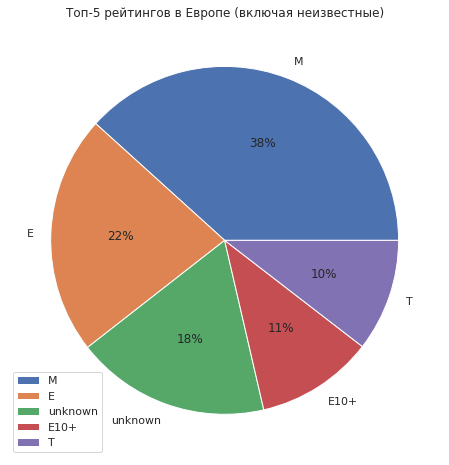

In [85]:
relevant_data.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(
    by='eu_sales', ascending=False).head().plot(kind='pie', figsize=(8, 8), autopct='%1.0f%%', subplots=True)
plt.title('Топ-5 рейтингов в Европе (включая неизвестные)') #построим круговую диаграмму 'Топ-5 рейтингов в Европе (включая неизвестные)'
plt.ylabel('')
plt.legend(loc='lower left')
plt.show()

У европейских пользователей точно такая же ситуация: на первом месте игры с рейтингом M (193 млн, 47%), следом идут игры с рейтингом E (112 млн, 27%) и игры с рейтингом E10+ (55 млн, 13%). Если оставить неизвестные рейтинги, они занимают третье место по популярности (91 млн, 18%).

In [86]:
#создадим сводную таблицу 'Топ-5 рейтингов в Японии'
jp_rating = new_relevant_data.pivot_table(
    index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()
jp_rating = jp_rating.reset_index().rename_axis(None, axis=1)
jp_rating

,rating,jp_sales
0,E,28.33
1,T,26.02
2,M,21.20
3,E10+,8.19


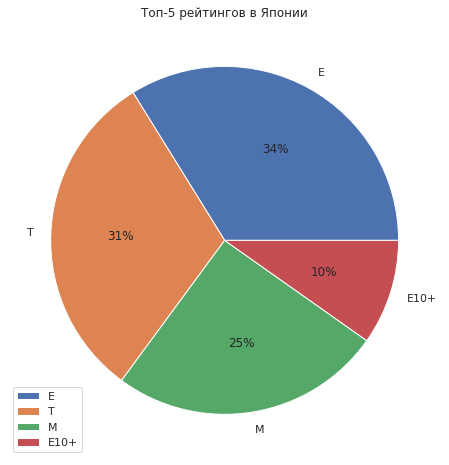

In [87]:
new_relevant_data.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(
    by='jp_sales', ascending=False).head().plot(kind='pie', figsize=(8, 8), autopct='%1.0f%%', subplots=True)
plt.title('Топ-5 рейтингов в Японии') #построим круговую диаграмму 'Топ-5 рейтингов в Японии'
plt.ylabel('')
plt.legend(loc='lower left')
plt.show()

In [88]:
#создадим альтернативную сводную таблицу 'Топ-5 рейтингов в Японии', включающую в себя неизвестные рейтинги
jp_rating_unknown = relevant_data.pivot_table(
    index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()
jp_rating_unknown = jp_rating_unknown.reset_index().rename_axis(None, axis=1)
jp_rating_unknown

,rating,jp_sales
0,unknown,108.84
1,E,28.33
2,T,26.02
3,M,21.20
4,E10+,8.19


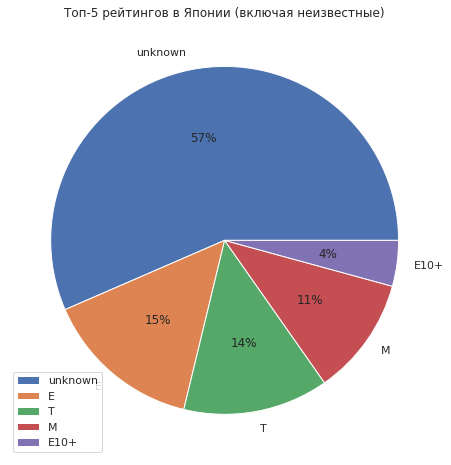

In [89]:
relevant_data.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(
    by='jp_sales', ascending=False).head().plot(kind='pie', figsize=(8, 8), autopct='%1.0f%%', subplots=True)
plt.title('Топ-5 рейтингов в Японии (включая неизвестные)') #построим круговую диаграмму 'Топ-5 рейтингов в Японии (включая неизвестные)'
plt.ylabel('')
plt.legend(loc='lower left')
plt.show()

У пользователей из Японии снова все по-другому: у большинства игр рейтинг E (28 млн, 34%), на втором месте рейтинг T (26 млн, 31%), на третьем - рейтинг M (21 млн, 25%). С неизвестными рейтингами здесь совершенно иная ситуация - если включать его в анализ, он займет первое место (108 млн, 57%), и только после пойдут все остальные. 

**Вывод:** Теперь мы можем составить портрет пользователя из каждого региона:  
+ Среднестатистический пользователь из Северной Америки пользуется платформой Xbox360, предпочитает игры в жанре action с рейтингом M. Так как X360 достаточно старая платформа, в качестве альтернативы можно выбрать развитие в направлении игр для платформ PlayStation, т.к. PS4 так же входит в топ-5 популярных платформ на североамериканском рынке.   
+ Среднестатистический пользователь из Европы пользуется платформой PS4, предпочитает игры в жанре action с рейтингом M.  
+ Среднестатистический пользователь из Японии пользуется платформой 3DS, предпочитает игры в жанре role-playing с неизвестным рейтингом или рейтингом E. 


### Проверка гипотез

**5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

Так как нам нужно определить равенство средних в двух выборках, воспользуемся t-критерием Стьюдента. Так как выборки независимы, применим двухвыборочный t-test для независимых выборок. По умолчанию нулевая гипотеза подразумевает, что средние двух выборок равны, а альтернативная гипотеза говоорит о том, что выборки неравны, соответственно, используем двусторонний тест.

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC разные.

In [90]:
xone_score = relevant_data[(relevant_data['platform'] == 'XOne') & (relevant_data['user_score'] > 0)]['user_score']
pc_score = relevant_data[(relevant_data['platform'] == 'PC') & (relevant_data['user_score'] > 0)]['user_score']
alpha = 0.05 #уровень статистической значимости
#проверяем гипотезу о равенстве средних 
results = st.ttest_ind(xone_score, pc_score,  equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


**Вывод:** Не получилось отвергнуть нулевую гипотезу, следовательно, у нас нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются.

**5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

Так же, как и в предыдущем случае нам нужно определить равенство средних в двух выборках, следовательно, воспользуемся t-критерием Стьюдента. Выборки независимы, поэтому применим двухвыборочный t-test для независимых выборок. По умолчанию нулевая гипотеза подразумевает, что средние двух выборок равны, а альтернативная гипотеза говоорит о том, что выборки неравны, соответственно, используем двусторонний тест.

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые.  
Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports разные.  

In [91]:
action_rating = relevant_data[(relevant_data['genre'] == 'Action') & (relevant_data['user_score'] > 0)]['user_score']
sports_rating = relevant_data[(relevant_data['genre'] == 'Sports') & (relevant_data['user_score'] > 0)]['user_score']
alpha = 0.05 #уровень статистической значимости
#проверяем гипотезу о равенстве средних
results = st.ttest_ind(action_rating, sports_rating,  equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 8.449849446620471e-20
Отвергаем нулевую гипотезу


**Вывод:** Отвергаем нулевую гипотезу, следовательно средние пользовательские рейтинги жанров Action и Sports разные.

### Общий вывод

До середины 90-х игр выпускалось не очень много, т.к. компьютеры и игровые приставки в то время были далеко не у всех. К середине 90-х мы видим плавный рост вместе с распространением приставок и ПК. Пик значений (свыше 1400) приходится на 2008 и 2009 год. Далее мы видим спад, скорее всего, связанный с развитием смартфонов и выпуском игр исключительно для мобильных устройств.  
В первой десятке платформ с наибольшими суммарными продажами, в основном, различные приставки и игровые консоли: PS2, X360, PS3, Wii, DS, PS. Самая популярная платформа PS2 (более 1200 млн продаж), следом за ней идут X360 и PS3 с продажами, превышающими 900 млн.   
В среднем платформы существуют около 10 лет: в первые пять происходит активный рост, к 5-6 годам достигает своего пика, и идет на спад.  
Актуальный период анализируемых данных для дальнейшего прогнозирования 4-5 лет, поэтому берем данные за 2012-2016 годы. К 2016 году лучшие продажи оказались у PS4 и XOne, которые сравнительно недавно появились на рынке (в 2013) и у 3DS, они и являются потенциально прибыльными в будущем.  
Вне зависимости от платформы линейная зависимость между оценкой критиков и объемом продаж наблюдается слабо, линейная зависимость между оценкой пользователей и объемом продаж не наблюдается.  
При анализе медианных продаж самый прибыльный жанр - Shooter, за ним идет Sports, а наименее прибыльный - Adventure.
Портрет пользователя из каждого региона выглядит следующим образом:  
Среднестатистический пользователь из Северной Америки пользуется платформой X360, предпочитает игры в жанре Action с рейтингом M.  
Среднестатистический пользователь из Европы пользуется платформой PS4, предпочитает игры в жанре Action с рейтингом M.  
Среднестатистический пользователь из Японии пользуется платформой 3DS, предпочитает игры в жанре role-playing с неизвестным рейтингом или рейтингом E.    
Наконец, было проведено два t-теста на проверку гипотез:  
1) В первом случае был использован двухвыборочный t-test для независимых выборок для проверки (нулевой) гипотезы о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Нулевую гипотезу отвергнуть не удалось, следовательно, Не получилось отвергнуть нулевую гипотезу, следовательно, у нас нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются.  
2) Во втором случае также был использован двухвыборочный t-test для независимых выборок для проверки (альтернативной) гипотезы о том, что средние пользовательские рейтинги жанров Action и Sports разные. Нулевая гипотеза была отвергнута в пользу альтернативной, следовательно средние пользовательские рейтинги жанров Action и Sports разные.  

Исходя из проделанного анализа можно сделать вывод, что в 2017 году стабильно высокие продажи покажут платформы PS4, XOne и 3DS, популярными жанрами будут Shooter и Sports. Для североамериканского и европейского рынка стоит сосредоточиться на продажах игр на платформах X360 и PS4 в жанре Action с рейтингом M, для японского рынка – на платформе 3DS в жанре Role-playing с рейтингом E т.к большая часть популярных рейтингов в этом регионе неизвестна. Так как X360 достаточно старая платформа, в качестве альтернативы можно выбрать развитие в направлении игр для платформ PlayStation, т.к. PS4 так же входит в топ-5 популярных платформ на североамериканском и европейском рынке.  
